# Gradient Descent Regression example

In this notebook, an example using the gradient descent method for regression is presented.
For the data, the "Boston House Prices" dataset from kaggle (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices) is used where we try and predict the price of houses in Boston.

First, import the required libraries.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
os.chdir("C:\\Users\\main\\Proton Drive\\laurin.koller\\My files\\ML\\repos\\OrionML")

import OrionML as orn

The data is imported in a pandas DataFrame and the first 5 columns of the data are displayed. The Columns are:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in \$1000's

In [9]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df= pd.read_csv("C:\\Users\\main\\Proton Drive\\laurin.koller\\My files\\ML\\repos\\OrionML\\Examples\\example data\\Boston Housing Prices\\housing.csv", 
                   delimiter=r"\s+", header=None, names=column_names)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Data Cleaning

Let's check for any missing values and duplicate rows in the dataset.

In [12]:
print("Number of missing values in each column: ")
display(df.isnull().sum())

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

Number of missing values in each column: 


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


Number of duplicate rows: 0


## Price Prediction

We use the RM, AGE, DIS, RAD and TAX columns to try and predict MEDV. To do this, we select the desired columns from the data and split them into a test and validation set. The random seed that numpy uses is also set for reproducability.

In [15]:
np.random.seed(0)

#data = df[["RM", "AGE", "DIS", "RAD", "TAX", "MEDV"]]
data = df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]]
data_arr = np.array(data)

train, val = orn.utils.train_test_split(data_arr, train=0.8, shuffle=True)
train_X = train[:,:-1]
train_y = train[:,-1].reshape(-1,1)
val_X = val[:,:-1]
val_y = val[:,-1].reshape(-1,1)

Now a object of type orn.method.GDRegressor is created and the training data is fit to the training targets.

In [106]:
np.random.seed(0)

clf = orn.method.GDRegressor(loss_function="squared_error", learning_rate=3.2e-6, num_iters=10000000, verbose=True, batch_size=None)#, penalty="L2", l=0.01)

clf.fit(train_X, train_y)

Iteration    0: Cost 165714.8129
Iteration 1000000: Cost  26.1553
Iteration 2000000: Cost  26.0688
Iteration 3000000: Cost  26.0052
Iteration 4000000: Cost  25.9509
Iteration 5000000: Cost  25.9013
Iteration 6000000: Cost  25.8545
Iteration 7000000: Cost  25.8094
Iteration 8000000: Cost  25.7657
Iteration 9000000: Cost  25.7231


In [104]:
pred = clf.predict(val_X)
print(orn.Loss.mse().value(val_y, pred))
print(orn.Loss.mse().value(train_y, clf.predict(train_X)))

17.336018646930295
26.15528365549306


In [90]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

blf = SGDRegressor(loss="squared_error", penalty="l2", max_iter=1000)
blf.fit(train_X, train_y.reshape(-1))

SGDRegressor()

In [92]:
pb = blf.predict(val_X)

In [94]:
pb[:5], val_y[:5]

(array([ 2.70410561e+13, -2.23484166e+13,  6.22909714e+12, -7.43706704e+13,
         2.02839801e+13]),
 array([[39.8],
        [17.8],
        [19.6],
        [14.9],
        [22. ]]))

In [78]:
print(orn.Loss.mse().value(val_y, clf.predict(val_X)))
print(orn.Loss.mse().value(train_y, clf.predict(train_X)))

print(orn.Loss.mse().value(val_y, blf.predict(val_X).reshape(-1,1)))
print(orn.Loss.mse().value(train_y, blf.predict(train_X).reshape(-1,1)))

16.83881955545391
25.950860796981175
3.0861358235525914e+28
2.9538994842124593e+28


In [27]:
Jh, wh, bh = clf.history
Jh=np.array(Jh)
Jh_val = np.array([orn.Loss.mse().value(val_y, np.matmul(val_X, wi)+bi) for wi,bi in zip(wh, bh)])

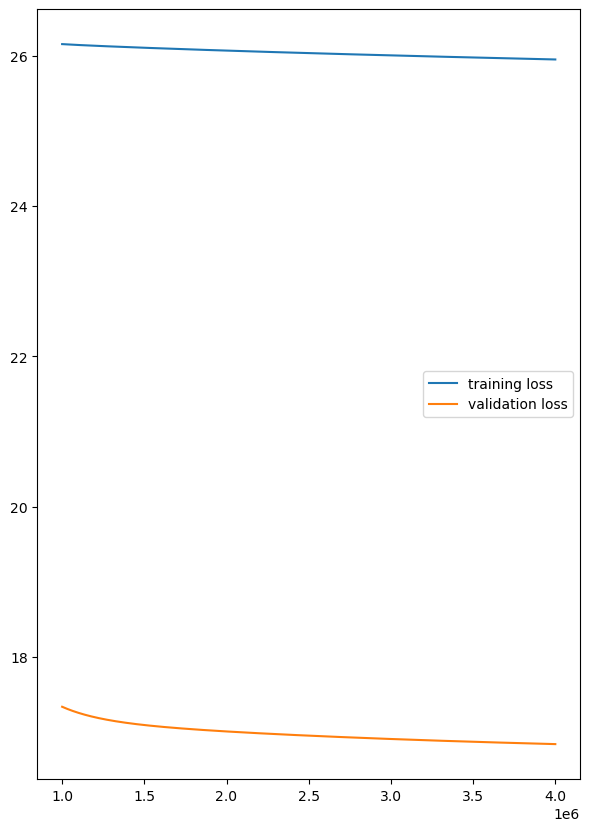

In [28]:
plt.figure(figsize=(7,10))
lims = [1000000,4000000]
x_axis = np.arange(len(Jh))
plt.plot(x_axis[lims[0]:lims[1]], Jh[lims[0]:lims[1]], label="training loss")
plt.plot(x_axis[lims[0]:lims[1]], Jh_val[lims[0]:lims[1]], label="validation loss")
plt.legend(loc="best")

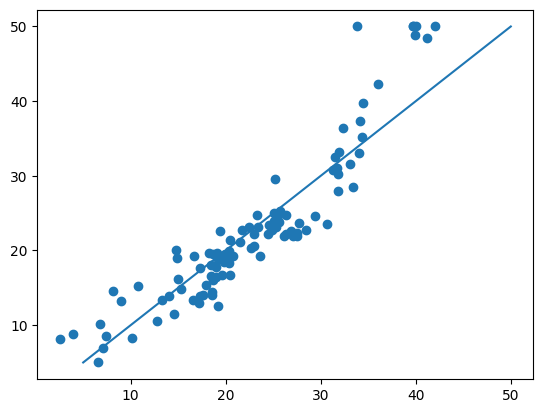

In [66]:
plt.scatter(blf.predict(val_X), val_y)
plt.plot([5,50],[5,50])

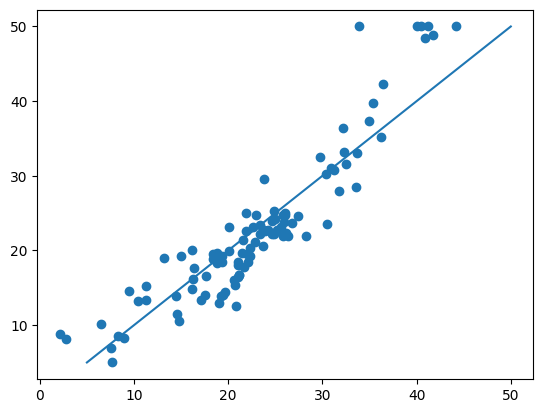

In [64]:
plt.scatter(clf.predict(val_X), val_y)
plt.plot([5,50],[5,50])

<Axes: >

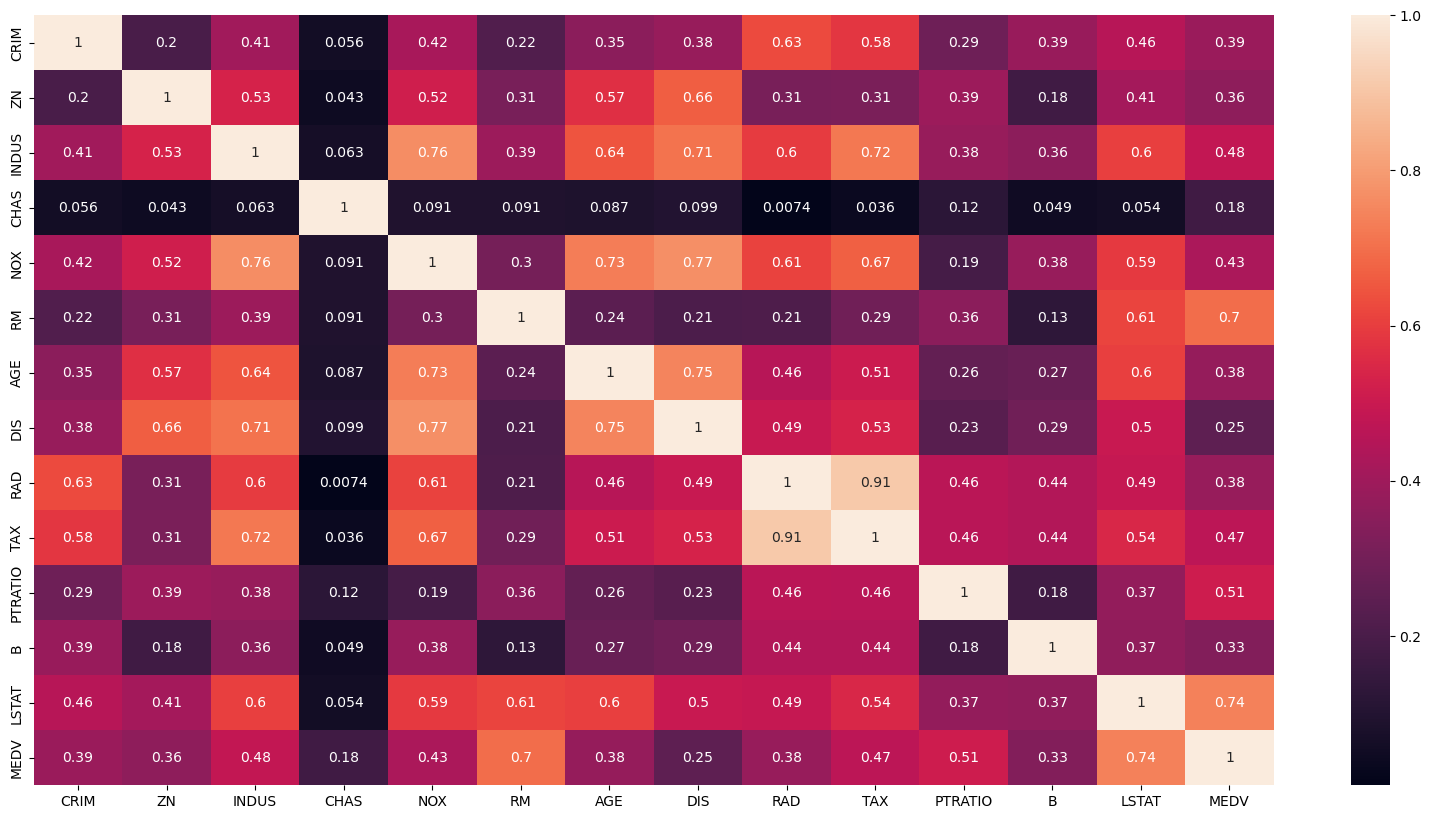

In [81]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr().abs(), annot=True)

Next, the random seed that numpy uses is set for reproducability. Then the data is split between a training and validation set where 80% of the data is used in the training set. For this the DataFrame is converted to a numpy array. Then the training and validation set are split into the features and the target variables. The gradient descent regressor method expects the targets to be two dimensional with second dimension 1, so the training and validation targets are reshaped.

In [30]:
np.random.seed(0)

train, val = orn.utils.train_test_split(data.to_numpy(), train=0.8, shuffle=True)
train_X = train[:,1:]
train_y = train[:,0].reshape(-1,1)
val_X = val[:,1:]
val_y = val[:,0].reshape(-1,1)

Now a object of type orn.method.GDRegressor is created and the training data is fit to the training targets.

In [33]:
clf = orn.method.GDRegressor(loss_function="squared_error", learning_rate=1e-5, num_iters=100, verbose=True, batch_size=None)

clf.fit(train_X, train_y)

Iteration    0: Cost 220827.6101
Iteration   10: Cost 100349.4384
Iteration   20: Cost 64533.6314
Iteration   30: Cost 53885.3045
Iteration   40: Cost 50718.4845
Iteration   50: Cost 49775.6832
Iteration   60: Cost 49494.0136
Iteration   70: Cost 49408.8781
Iteration   80: Cost 49382.1662
Iteration   90: Cost 49372.8220


We can now predict the weights of the fish in the validation data.

In [36]:
pred = clf.predict(val_X)
diff = val_y-pred

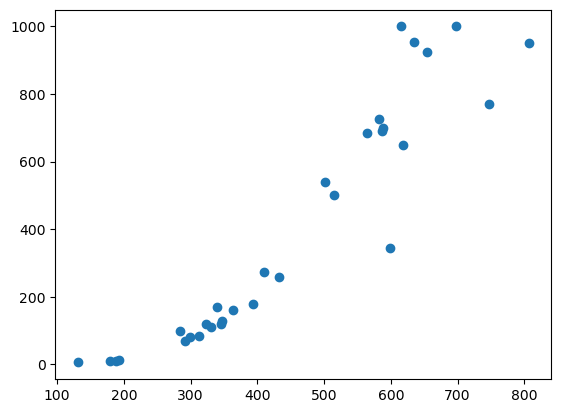

In [40]:
plt.scatter(pred, val_y)

In [45]:
data.filter(pl.col("Species")=="Bream")

Species,Weight,Length1,Length2,Length3,Height,Width
str,f64,f64,f64,f64,f64,f64
"""Bream""",242.0,23.2,25.4,30.0,11.52,4.02
"""Bream""",290.0,24.0,26.3,31.2,12.48,4.3056
"""Bream""",340.0,23.9,26.5,31.1,12.3778,4.6961
"""Bream""",363.0,26.3,29.0,33.5,12.73,4.4555
"""Bream""",430.0,26.5,29.0,34.0,12.444,5.134
…,…,…,…,…,…,…
"""Bream""",920.0,35.0,38.5,44.1,18.0369,6.3063
"""Bream""",955.0,35.0,38.5,44.0,18.084,6.292
"""Bream""",925.0,36.2,39.5,45.3,18.7542,6.7497


In [38]:
diff[:5]

array([[ 112.28119399],
       [ 320.56083318],
       [-254.19552951],
       [ 302.63103512],
       [  22.86855202]])

In [31]:
train_X[:5]

array([[27.6   , 30.    , 35.    , 12.67  ,  4.69  ],
       [19.    , 20.5   , 22.8   ,  6.4752,  3.3516],
       [21.5   , 23.5   , 25.    ,  6.275 ,  3.725 ],
       [20.5   , 22.5   , 25.3   ,  7.0334,  3.8203],
       [32.    , 34.5   , 36.5   , 10.2565,  6.3875]])

In [32]:
train_y[:5]

array([[390.],
       [  0.],
       [170.],
       [160.],
       [556.]])